In [28]:
# ! pip install phasespace vector awkward matplotlib

A simple example
--------------------------


With these considerations in mind, one can build a decay chain by using the ``set_children`` method of the ``GenParticle``
class (which returns the class itself). As an example, to build the $B^{+}\to K^+ \pi^+ \pi^-$ decay, we would write:


In [7]:
from phasespace import GenParticle

BPLUS_MASS = 5.27925
PION_MASS  = 0.13957
KAON_MASS  = 0.49368

piplus = GenParticle('pi+', PION_MASS)
piminus = GenParticle('pi-', PION_MASS)
kplus = GenParticle('K+', KAON_MASS)
bplus = GenParticle('B+', BPLUS_MASS)

bplus.set_children(kplus, piplus, piminus)

<phasespace.GenParticle: name='B+' mass=5.28 children=[K+, pi+, pi-]>



Phasespace events can be generated using the ``generate`` method, which gets the number of events to generate as input.
The method returns:

- The normalized weights of each event, as an array of dimension (n_events,).
- The 4-momenta of the generated particles as values of a dictionary with the particle name as key. These momenta
  are expressed as arrays of dimension (n_events, 4).


In [10]:
N_EVENTS = 1000

weights, particles = bplus.generate(n_events=N_EVENTS)

2023-06-21 17:29:27.687756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'n_events' with dtype int64
	 [[{{node n_events}}]]
2023-06-21 17:29:27.779443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'n_events' with dtype int64
	 [[{{node n_events}}]]
2023-06-21 17:29:27.793840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'n_events' with dtype int64
	 [[{{node n_events}}]]
2023-06-21 17:29:27.881221: I tensorflow/core/common_runti

In [11]:
particles

{'K+': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[ 0.58544537, -0.71443819, -2.42826663,  2.64449749],
        [-1.59790527, -1.01993749,  0.19374439,  1.96845893],
        [-0.1278171 , -0.24371163,  0.6447497 ,  0.85741162],
        ...,
        [ 1.86456135, -1.08543598,  0.85480333,  2.37258698],
        [ 1.30483702, -0.00775103, -1.46394729,  2.02225649],
        [ 0.28646562,  0.46885716,  1.41540017,  1.59654852]])>,
 'pi+': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.41918271,  0.43332666,  1.12520828,  1.28415716],
        [-0.34473113, -0.61656992,  0.17309884,  0.74056804],
        [-1.65656443, -0.6820008 ,  0.77496223,  1.95687942],
        ...,
        [ 0.13809021,  0.31400413,  0.2899532 ,  0.47034045],
        [-1.39590079, -0.83582206,  1.70813042,  2.36311804],
        [ 0.17527733, -1.79526873, -0.20020038,  1.82023952]])>,
 'pi-': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.16626266,  0.28111152,  1.30305835, 

For convenience, we write a simple function to extract the 4-momenta, using the [vector](https://vector.readthedocs.io/en/latest/) package:

In [26]:
import vector

def get_fourmomenta(momenta):
    """slightly more involved with vector.zip; much faster"""
    momenta = momenta.numpy()
    return vector.zip({
        "px": momenta[:, 0],
        "py": momenta[:, 1],
        "pz": momenta[:, 2],
        "E": momenta[:, 3]
    })

pk = get_fourmomenta(particles['K+'])

We can now plot kinematic variables, such as the momentum magnitude of the Kaon. Note that we need to include the weights of our MC samples.

(array([ 3.29815792,  6.61919647, 18.02532321, 19.90961258, 27.72836334,
        25.2972502 , 31.65660436, 44.92062332, 49.63856494, 50.85294258]),
 array([0.12985843, 0.37745983, 0.62506122, 0.87266262, 1.12026401,
        1.36786541, 1.6154668 , 1.8630682 , 2.11066959, 2.35827099,
        2.60587238]),
 <BarContainer object of 10 artists>)

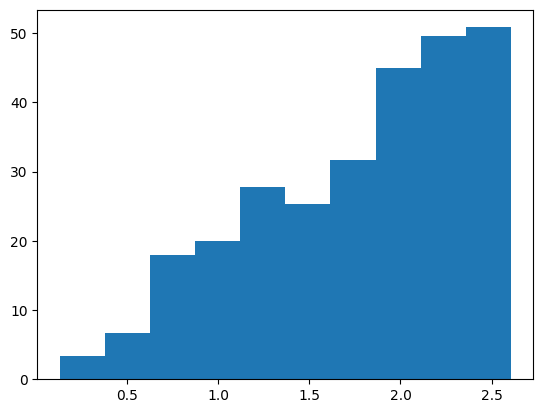

In [27]:
import matplotlib.pyplot as plt

plt.hist(pk.p, weights=weights)